In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
# Read all csvs into one dataframe

path = r'C:\Users\ab78\Projects\YSJ Year 2\AppML\Coursework\Sleep Project\data\downloaded_met' # use your path
all_files = glob.glob(path + "/*.csv")

frame_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    frame_list.append(df)

weather_data_df = pd.concat(frame_list, axis=0, ignore_index=True)

# Separate date into date and time columns
weather_data_df.insert(loc=1, column='Date', value=pd.to_datetime(weather_data_df['Unnamed: 0']).dt.date)
weather_data_df.insert(loc=2, column='Time', value=pd.to_datetime(weather_data_df['Unnamed: 0']).dt.time)

# Remove unhelpful columns (precipitation not recorded well)
weather_data_df = weather_data_df[['Date', 'wind_speed', 'visibility_distance','air_temperature', 'humidity']]
weather_data_df = weather_data_df.replace('MISSING', np.nan)

weather_data_df['wind_speed'] = weather_data_df['wind_speed'].astype(float)
weather_data_df['visibility_distance'] = weather_data_df['visibility_distance'].astype(float)

In [3]:
# Aggregate weather data
weather_grouped_df = weather_data_df.groupby(weather_data_df['Date']).agg(['mean', 'min','max','sum'])

weather_grouped_df.columns = ["_".join(col_name).rstrip('_') for col_name in weather_grouped_df.columns.to_flat_index()]
weather_grouped_df.reset_index(inplace=True)
weather_grouped_df

,Date,wind_speed_mean,wind_speed_min,wind_speed_max,wind_speed_sum,visibility_distance_mean,visibility_distance_min,visibility_distance_max,visibility_distance_sum,air_temperature_mean,air_temperature_min,air_temperature_max,air_temperature_sum,humidity_mean,humidity_min,humidity_max,humidity_sum
0,2017-01-01,3.766667,3.6,4.1,11.3,18333.333333,14000.0,23000.0,55000.0,3.966667,3.7,4.2,11.9,NaN,NaN,NaN,0.0
1,2017-01-02,2.637500,0.5,4.6,126.6,17735.000000,7000.0,30000.0,602990.0,1.950000,-3.0,5.0,93.6,86.125000,70.0,100.0,2067.0
2,2017-01-03,2.848148,0.0,5.1,153.8,17171.114286,7000.0,35000.0,600989.0,1.176364,-5.0,5.0,64.7,88.414634,75.0,100.0,3625.0
3,2017-01-04,3.411321,0.5,5.1,180.8,20573.978723,9999.0,45000.0,966977.0,4.775926,-3.0,8.1,257.9,77.981481,61.0,93.0,4211.0
4,2017-01-05,0.790741,0.0,2.1,42.7,14255.555556,1900.0,21000.0,384900.0,-1.327778,-6.0,6.0,-71.7,88.481481,65.0,100.0,4778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2022-03-31,6.110606,2.6,10.3,403.3,18408.439394,5000.0,50000.0,1214957.0,2.851515,0.0,7.1,188.2,71.515152,45.0,87.0,4720.0
1910,2022-04-01,6.004167,1.5,9.8,432.3,19304.888889,9999.0,55000.0,1389952.0,3.204167,-3.0,8.1,230.7,69.680556,31.0,93.0,5017.0
1911,2022-04-02,2.392308,0.5,6.7,155.5,16419.507692,4600.0,55000.0,1067268.0,1.666154,-4.5,9.0,108.3,76.723077,35.0,96.0,4987.0
1912,2022-04-03,2.494444,0.0,6.2,179.6,14379.986111,800.0,50000.0,1035359.0,3.022222,-5.0,10.0,217.6,69.291667,43.0,98.0,4989.0


In [4]:
#weather_grouped_df = weather_grouped_df[['Date','visibility_distance_max','','air_temperature_max', 'humidity_mean']]
weather_grouped_df = weather_grouped_df[['Date','visibility_distance_mean','visibility_distance_min','visibility_distance_max','air_temperature_mean','air_temperature_min','air_temperature_max', 'humidity_max','humidity_min','humidity_mean']]

In [5]:
weather_grouped_df

,Date,visibility_distance_mean,visibility_distance_min,visibility_distance_max,air_temperature_mean,air_temperature_min,air_temperature_max,humidity_max,humidity_min,humidity_mean
0,2017-01-01,18333.333333,14000.0,23000.0,3.966667,3.7,4.2,NaN,NaN,NaN
1,2017-01-02,17735.000000,7000.0,30000.0,1.950000,-3.0,5.0,100.0,70.0,86.125000
2,2017-01-03,17171.114286,7000.0,35000.0,1.176364,-5.0,5.0,100.0,75.0,88.414634
3,2017-01-04,20573.978723,9999.0,45000.0,4.775926,-3.0,8.1,93.0,61.0,77.981481
4,2017-01-05,14255.555556,1900.0,21000.0,-1.327778,-6.0,6.0,100.0,65.0,88.481481
...,...,...,...,...,...,...,...,...,...,...
1909,2022-03-31,18408.439394,5000.0,50000.0,2.851515,0.0,7.1,87.0,45.0,71.515152
1910,2022-04-01,19304.888889,9999.0,55000.0,3.204167,-3.0,8.1,93.0,31.0,69.680556
1911,2022-04-02,16419.507692,4600.0,55000.0,1.666154,-4.5,9.0,96.0,35.0,76.723077
1912,2022-04-03,14379.986111,800.0,50000.0,3.022222,-5.0,10.0,98.0,43.0,69.291667


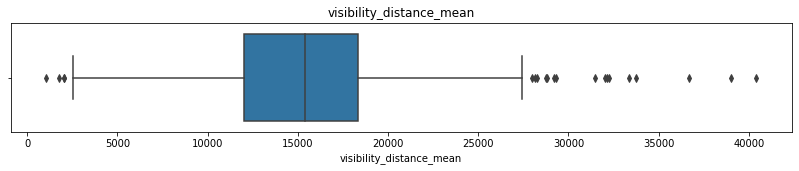

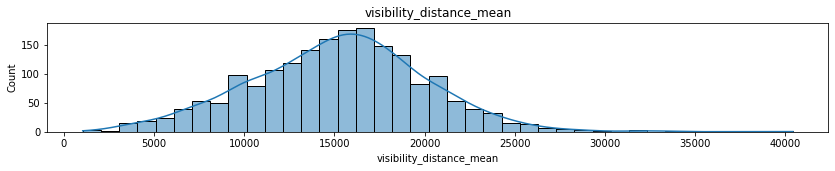

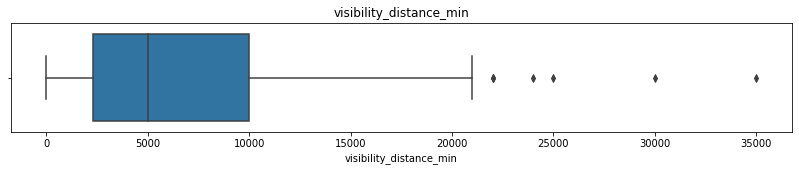

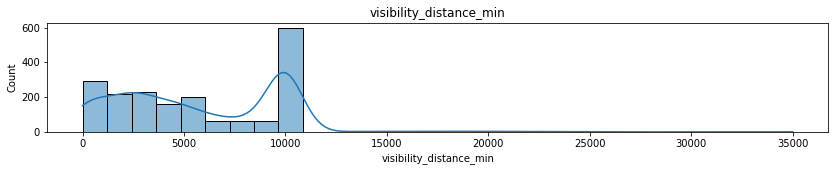

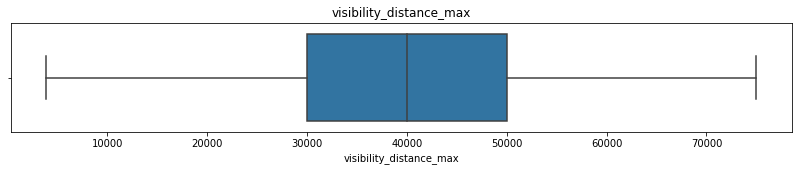

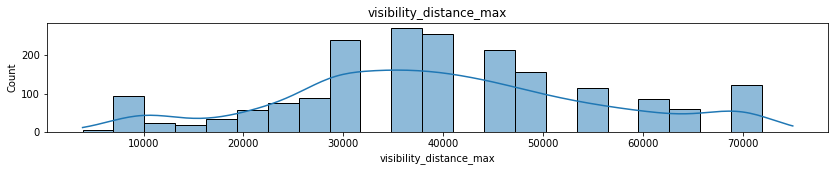

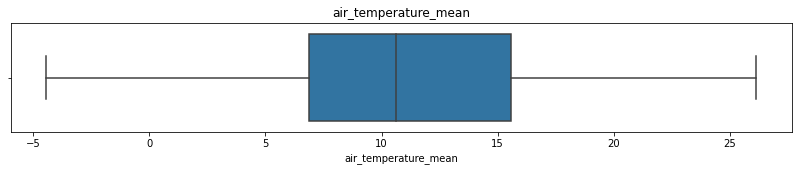

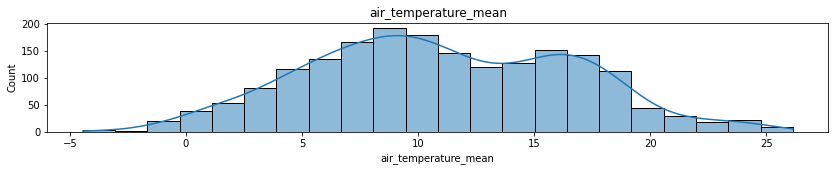

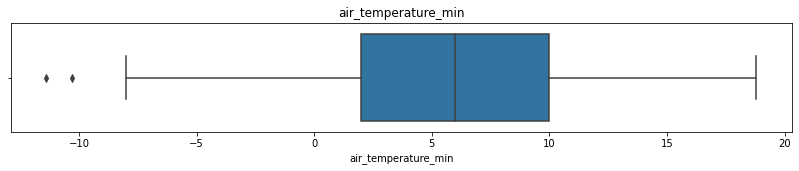

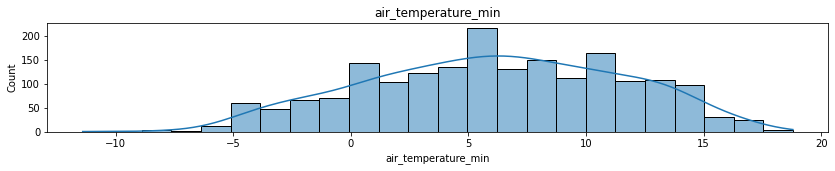

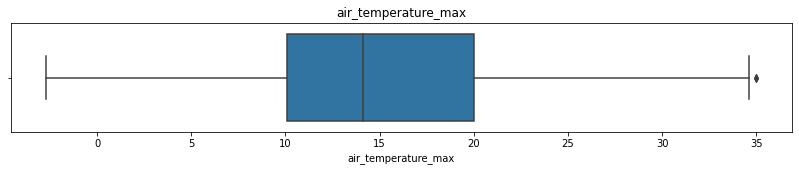

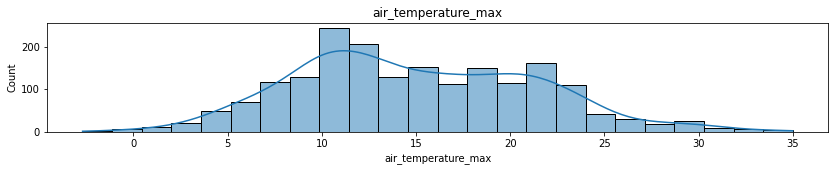

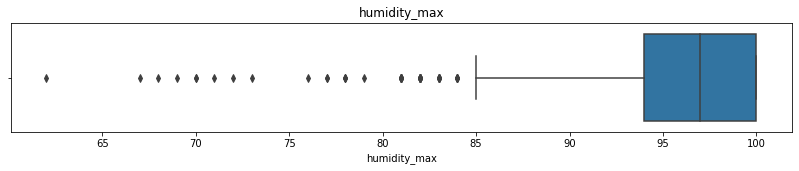

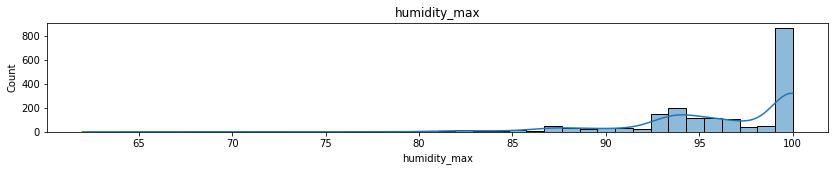

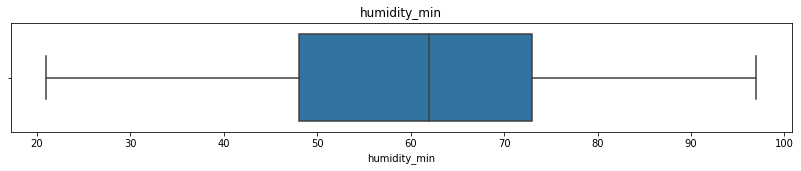

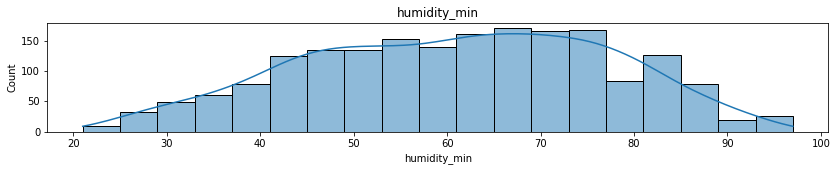

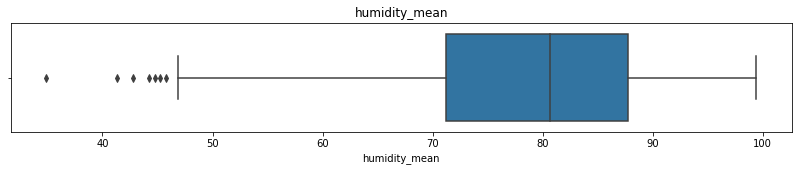

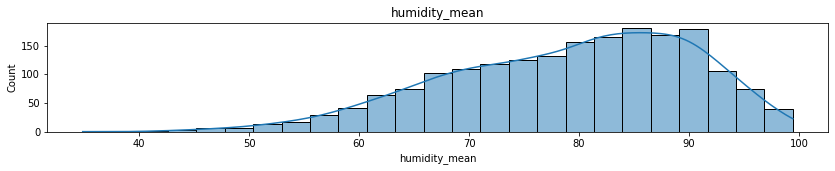

In [6]:
df_num = weather_grouped_df.select_dtypes(include=[np.number])

for i in df_num.columns:
    col = df_num[i].dropna()
    fig, ax = plt.subplots(figsize=(14, 2))
    sns.boxplot(x=col)
    ax.set_title(i)

    plt.show()

    fig2, ax2 = plt.subplots(figsize=(14, 2))
    sns.histplot(data=col,kde=True)

    ax2.set_title(i)

In [7]:
weather_grouped_df.to_excel('../data/cleaned_weather_data.xlsx')